In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import freud as freud

# Definitions of all functions used

In [2]:
def block_recognition(file):
    a=False # first block'<'
    b=False # second block '<'
    c=False # third block '>'
    d=False # fourth block'>'
    i=0
    O_boundary=pd.DataFrame((), columns=[])
    Oh=[]
    aOh1=[]
    Ol=[]
    aOl1=[]
    bOh=[]
    bOl=[]
    block=[]
    l=0
    check=True
    ## Because the building block is constructing the structure in a such way that 
    while i<len(file):
        if l<32:
            
            # Check for first '<' and print'<' if there is and a=True
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k

           #search for second '<' and print '<' if found b=True 
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k

            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                c=True
                check=False
                k=i+8
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                i=k
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                c=True
                check=False
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                k=i+8
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k

            #Look if the cell is fully completed, i.e. if '<''<' and '>' '>' has been found
            if a==True and b==True and c==True and d==True :
                a=False
                b=False
                c=False
                d=False
                l+=1
                check=True
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                block+=['water']
                i+=1
            else:
                
                if check==False:
                    i+=1
                    block+=['bridge']
                if check==True: 
                    block+=['-']
                    #print(file.iloc[i]['type'])
                    i+=1
        
        if l==32:
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                check=True
                block+=['water']
                i+=1
            else:
                i+=1
                block+=['-']
    ### Addin the collumn to define the block 
    file['block']=block

    #adding a collumn that describe to which cell/cell boundary the item belongs 
    # if 0 it belong to upper or lower layer

    O_boundary['Ohid']=Oh
    O_boundary['Olid']=Ol
    return O_boundary, file


In [3]:
def O_boundarysearch(final, O_boundary): 
    Oh=[]
    Ol=[]
    for index, boundary in O_boundary.iterrows():
        for index, point in final.iterrows():
            if float(point['id'])==boundary['Ohid']: 
                Oh+=[[point['x'],point['y'],point['z']]]
            if float(point['id'])==boundary['Olid']: 
                Ol+=[[point['x'],point['y'],point['z']]]
    O_boundary['Oh']=Oh
    O_boundary['Ol']=Ol
    return O_boundary



In [4]:
def Cell_planes(O_boundary, df_location):
#### Defining the datafram that contain the normals of a cell, i.e. 4 collumns
    Cellplanes=pd.DataFrame((), columns=[])
    na1=[]
    na0=[]
    nb0=[]
    nb1=[]
    out=[]
    idl=[]
    ### Looping over all the cells and check if they have the corrext neighbours
    for k in range(0, len(O_boundary)):
        ### na1 direction of a1
        ### direction of a0
        k=(k)
        l=(df_location.iloc[k]['b0'])
        if l!='-': 
            l=int(l)
        n=(df_location.iloc[k]['a1'])
        i=0
        if n!='-':
            n=int((df_location.iloc[k]['a1']))
            m=(df_location.iloc[n]['b0'])
            if m!='-':
                m=int(m)
                # normal in a>0 direction
                na1+=[normal_plane(np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[k]['Oh']),np.array(O_boundary.iloc[l]['Oh']))]
                # normal in a<0 direction
                na0+=[normal_plane(np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[m]['Oh']),np.array(O_boundary.iloc[n]['Oh']))]
                #normal in b<0 direction
                nb0+=[normal_plane(np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[n]['Oh']),np.array(O_boundary.iloc[k]['Oh']))]
                #normal in b>0 direction
                nb1+=[normal_plane(np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[l]['Oh']),np.array(O_boundary.iloc[m]['Oh']))]
                idl+=[k]
            else:
                out+=[k]
        else:
            out+=[k]

## Associating into the associatate dataframe
    Cellplanes['na1']=na1
    Cellplanes['na0']=na0
    Cellplanes['nb0']=nb0
    Cellplanes['nb1']=nb1
    Cellplanes['id']=idl
    return Cellplanes

In [5]:
def normal_plane(point1, point2, point3,point4):
    vector1=point2-point1
    vector2=(point3+point4)/2-point1
    n=np.cross(vector1,vector2)
    d=-(n@point1)
    plane=[n[0],n[1],n[2],d]
    return np.array(plane)

In [6]:
def row(final,file):
    i=0
    final['cell']=-1
    final['row']=-1
    n=np.cross(np.array([26.9408000000,0,0]),np.array([-16.2851800000,24.8380840000,0]))
    d=-(n@np.array([1.4075400000/2,-12.4191160000/2,27.9873670000/2]))
    z=np.array([n[0],n[1],n[2],d])
    zi=[]
    block=[]
    for i in range(0,len(final)):
        #print(final.iloc[i],int(final.at[i,'id']) )
        block+=[file.iloc[int(final.at[i,'id'])-1]['block']]
        if final.iloc[i]['z']>27.9873670000/2:
            zi+=[1]
        if final.iloc[i]['z']<=27.9873670000/2:
            zi+=[0]
    final['zi']=zi
    final['block']=block

        #if final.iloc[i]['row']==-1:
         #   if a01<0:
          #      final.iloc[i]['x']+=26.9408000000
           #     final.at[i,'row']=3
            #else:
    return final

In [7]:
def read_box(file, i): 
    file=pd.read_csv(file, delim_whitespace=True, skiprows=i+4, nrows=3, names=['xy','xz','yz'], decimal='.')
    Lx=file.iloc[0]['xz']-file.iloc[0]['xy']
    Ly=file.iloc[1]['xz']-file.iloc[1]['xy']
    Lz=file.iloc[2]['xz']-file.iloc[2]['xy']
    xy=file.iloc[0]['yz']
    xz=file.iloc[1]['yz']
    yz=file.iloc[2]['yz']
    a,b,c=[Lx,0,0],[xy,Ly,0],[xz,yz,Lz]
    box = freud.box.Box.from_box([Lx,Ly,Lz,xy,xz,yz])
    #print(box)
    return box, np.array(a), np.array(b), np.array(c)

# 1st analysis - Evolution through times
Analysis with a fixed number of cycles

,id,mol,type,charges,x,y,z,cell,block,zi,row
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,-1,<l,0,-1
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,-1,<l,0,-1
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,-1,<l,0,-1
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,-1,<l,0,-1
4,5,3,3,0.84819,-0.903617,-2.813480,12.925742,-1,<l,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,-1,water,1,-1
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,-1,water,1,-1
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,-1,water,1,-1
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,-1,water,1,-1


,timestep,atoms
0,1,9
1,2035,2043
2,4069,4077
3,6103,6111
4,8137,8145
5,10171,10179
6,12205,12213
7,14239,14247
8,16273,16281
9,18307,18315


,timestep
0,0


,timestep
0,1000000


,timestep
0,3000000


,timestep
0,5000000


,timestep
0,7000000


,timestep
0,9000000


,timestep
0,11000000


,timestep
0,13000000


,timestep
0,15000000


,timestep
0,17000000


,timestep
0,19000000


,timestep
0,21000000


,timestep
0,23000000


,timestep
0,25000000


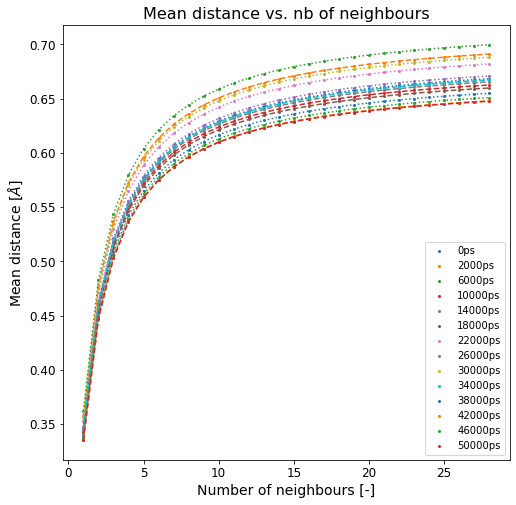

In [12]:
initial=pd.read_csv('data/qualitative/data_lmpo0001.lmp', delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import KDTree, cKDTree
from sklearn.neighbors import NearestNeighbors
import numpy as np
import freud as freud
O_boundaryi, initial=block_recognition(initial)
df=pd.read_csv('data/output/timestep.txt', delim_whitespace=True)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
#display(df_location)
time=0
n=30
timestep_t=[]

k=2 
    ###### Plot parameter #######
plt.figure(figsize=(8, 8))
    #############################
u=1

plt.set_cmap(cmap='Greens')

####### Compute the knowledges about the simulation ##############
initial=pd.read_csv('data/quantitative/%dcycle/data_lmpo0001.lmp'%k, delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
O_boundaryi, initial=block_recognition(initial)
df=pd.read_csv('data/output/timestep%d.txt'%k, delim_whitespace=True)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
final=initial
O_boundaryf=O_boundarysearch(final, O_boundaryi)
rows=row(final, initial)
display(rows)
#################################################################
display(df)
for i in range(len(df)): # Navigating through the timesteps 
    if i<len(df) and i%2==0:
        time=df.iloc[i]['timestep']
        ligne=df.iloc[i]['atoms']
        
        ######## Simulation situation ###########
        
        #########################################
        
            ######## Structure manipulations ########
        df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)

        final=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=ligne, nrows=2025, names=['id','type','x','y','z','vx','vy','vz','fx','fy','fz','cell', 'block','zi'])
        final_time=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=time, nrows=1, names=['timestep'])
        display(final_time)
        timestep_t=final_time.iloc[0]['timestep']*0.002
        O_boundaryf=O_boundarysearch(final, O_boundaryi)
        cellplanes=Cell_planes(O_boundaryf, df_location)
        rows=row(final, initial)
        #display(rows)
        #########################################
        box,a,b,c=read_box('data/quantitative/%dcycle/all.dump'%k, time)
            ##### Variable definition #####
        points=[]
        charge=[]
        idl=[]
        ###############################
            ### Find all the points of the interlayer of interest (here 1 or 0)
            ### And create a dataframe called df that compute the charge the id and the position of all that points
        typel=[]
        for index, point in rows.iterrows():    
            if point['zi']==0 and point['block']=='-':
                idl+=[i]
                i+=1
                x=float(point['x'])
                y=float(point['y'])
                z=float(point['z'])
                point2=np.array([x,y,z])
                point2-=a/2
                point2-=b/2
                point2-=c/2
                points+=[point2]
                typel+=[point['type']]
                charge+=[initial.iloc[int(point['id'])]['charges']]

            #dfi=pd.DataFrame({'points':points, 'charge':charge, 'idl':idl}, index = idl)
        l=[]
        rm=[]
        for x in range(2,n):
                ######################
                ######################
                ######################
            aq = freud.locality.AABBQuery(box, points)
            distances = []
            query_result = aq.query(points, dict(num_neighbors=n))
            nlist = query_result.toNeighborList()            
            for bond in query_result:
                distances.append([bond[2], bond[0],bond[1], typel[bond[0]], typel[bond[1]]])
                ######################
                ######################
                ######################
            rmi=0
            rm_n=0
            #(distances)
            for i in range(len(distances)):
                if distances[i][0]!=0 and distances[i][3]==1 and distances[i][4]==6:
                    rmi+=distances[i][0]
            rm_n=rmi/(len(distances)/(x-1))/(x)
            rm+=[rm_n]
            l+=[x-1]
            #print(l)
            #print(rm)
        plt.scatter(l,rm, label='%d'%timestep_t+'ps', s=4)
        if u==1:
            plt.plot(l,rm, linestyle=':')
            u=0
        else:
            plt.plot(l,rm, linestyle='--' )
            u=1

plt.xlabel('Number of neighbours [-]', fontsize=14)
plt.ylabel(r'Mean distance [$\AA$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Mean distance vs. nb of neighbours',fontsize = 16)
plt.legend()
plt.show()
    ### nearest neighbours
    ### fixed box method
    ### 



# 2nd nearest neighbours analysis - Last step - Effect of # cycles
here we are looking for all interlayer atoms, we notice that there is a slightl

,id,mol,type,charges,x,y,z,cell,block,zi,row
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,-1,<l,0,-1
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,-1,<l,0,-1
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,-1,<l,0,-1
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,-1,<l,0,-1
4,5,3,3,0.84819,-0.903617,-2.813480,12.925742,-1,<l,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,-1,water,1,-1
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,-1,water,1,-1
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,-1,water,1,-1
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,-1,water,1,-1


6
8
1
6
8
8
1
1
8
1
8
8
6
6
1
1
1
8
6
1
6
1
8
8
8
1
8
6
1
8
6
1
8
1
6
6
8
6
1
1
1
6
8
8
6
8
8
6
1
1
1
6
6
8
6
8
6
1
1
6
1
6
8
6
1
1
6
8
8
8
1
8
1
6
1
6
1
6
6
8
6
8
6
8
8
6
1
1
6
1
8
6
8
1
8
6
1
8
6
1
1
6
8
6
1
8
8
6
1


,id,mol,type,charges,x,y,z,cell,block,zi,row
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,-1,<l,0,-1
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,-1,<l,0,-1
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,-1,<l,0,-1
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,-1,<l,0,-1
4,5,3,3,0.84819,-0.903617,-2.813480,12.925742,-1,<l,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,-1,water,1,-1
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,-1,water,1,-1
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,-1,water,1,-1
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,-1,water,1,-1


6
8
1
1
8
6
1
6
8
1
6
1
8
8
6
1
1
6
6
8
1
8
8
6
8
8
6
1
1
6
6
8
1
1
6
1
8
6
8
8
1
6
6
8
8
1
1
1
6
8
8
6
1
1
1
8
6
1
1
6
6
8
1
1
6
6
8
8
1
6
8
8
8
1
6
8
6
8
6
6
8
6
1
1
8
6
1
8
1
8
6
8
8
6
6
1
6
1
8
1
1
1
1
1
6
6
6
8
8


,id,mol,type,charges,x,y,z,cell,block,zi,row
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,-1,<l,0,-1
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,-1,<l,0,-1
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,-1,<l,0,-1
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,-1,<l,0,-1
4,5,3,3,0.84819,-0.903617,-2.813480,12.925742,-1,<l,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,-1,water,1,-1
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,-1,water,1,-1
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,-1,water,1,-1
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,-1,water,1,-1


8
8
6
1
1
6
1
1
6
8
6
8
8
1
1
6
8
6
8
6
1
1
6
6
8
1
8
1
6
1
8
6
8
6
6
8
8
1
1
6
1
6
1
8
1
6
8
1
1
1
6
6
1
8
8
6
1
1
8
1
6
6
8
1
8
6
8
8
1
6
8
6
6
6
8
6
1
1
8
8
1
6
8
6
1
8
6
8
1
8
8
6
1
1
6
8
1
1
1
6
6
6
1
8
8
6
1
8
8


,id,mol,type,charges,x,y,z,cell,block,zi,row
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,-1,<l,0,-1
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,-1,<l,0,-1
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,-1,<l,0,-1
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,-1,<l,0,-1
4,5,3,3,0.84819,-0.903617,-2.813480,12.925742,-1,<l,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,-1,water,1,-1
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,-1,water,1,-1
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,-1,water,1,-1
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,-1,water,1,-1


8
8
6
1
1
6
1
1
6
8
6
8
8
1
1
6
8
6
8
6
1
1
6
6
8
1
8
1
6
1
8
6
8
6
6
8
8
1
1
6
1
6
1
8
1
6
8
1
1
1
6
6
1
8
8
6
1
1
8
1
6
6
8
1
8
6
8
8
1
6
8
6
6
6
8
6
1
1
8
8
1
6
8
6
1
8
6
8
1
8
8
6
1
1
6
8
1
1
1
6
6
6
1
8
8
6
1
8
8


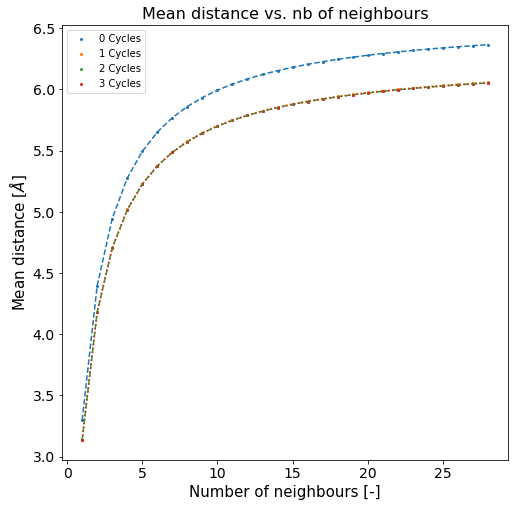

In [10]:
initial=pd.read_csv('data/qualitative/data_lmpo0001.lmp', delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import KDTree, cKDTree
from sklearn.neighbors import NearestNeighbors
import numpy as np
import freud as freud
O_boundaryi, initial=block_recognition(initial)
df=pd.read_csv('data/output/timestep.txt', delim_whitespace=True)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
#display(df_location)
time=0
n=30
timestep_t=[]
plt.figure(figsize=(8, 8))
alpha1=['--',':','--',':']


for k in range(4):
    
    ###### Plot parameter #######
    #############################

    ####### Compute the knowledges about the simulation ##############
    initial=pd.read_csv('data/quantitative/%dcycle/data_lmpo0001.lmp'%k, delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
    O_boundaryi, initial=block_recognition(initial)
    df=pd.read_csv('data/output/timestep.txt', delim_whitespace=True)
    df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
    final=initial
    O_boundaryf=O_boundarysearch(final, O_boundaryi)
    cellplanes=Cell_planes(O_boundaryf, df_location)
    rows=row(final, initial)
    display(rows)
    #################################################################
    
    
    for index, i in df.iterrows(): # Navigating through the timesteps 
        
        ######## Simulation situation ###########
        ligne=i['atoms']
        time=i['timestep']
        #########################################
        
        ######## Structure manipulations ########
        final=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=ligne, nrows=2025, names=['id','type','x','y','z','vx','vy','vz','fx','fy','fz','cell', 'block','zi'])
        final_time=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=time, nrows=1, names=['timestep'])
        timestep_t=final_time.iloc[0]['timestep']
        O_boundaryf=O_boundarysearch(final, O_boundaryi)
        cellplanes=Cell_planes(O_boundaryf, df_location)
        rows=row(final, initial)
        #display(rows)
        #########################################
        box,a,b,c=read_box('data/quantitative/%dcycle/all.dump'%k, time)

        ##### Variable definition #####
        points=[]
        charge=[]
        idl=[]
        ###############################
        
        ### Find all the points of the interlayer of interest (here 1 or 0)
        ### And create a dataframe called df that compute the charge the id and the position of all that points
        if time==df.iloc[len(df)-1]['timestep']:
            for index, point in rows.iterrows():    
                if point['zi']==0 and (point['block']=='-'):
                    print(point['type'])
                    idl+=[i]
                    i+=1
                    x=float(point['x'])
                    y=float(point['y'])
                    z=float(point['z'])
                    point2=np.array([x,y,z])
                    point2-=a/2
                    point2-=b/2
                    point2-=c/2
                    points+=[point2]
                    charge+=[initial.iloc[int(point['id'])]['charges']]

            #dfi=pd.DataFrame({'points':points, 'charge':charge, 'idl':idl}, index = idl)
            l=[]
            rm=[]
            for x in range(2,n):
                ######################
                ######################
                ######################
                aq = freud.locality.AABBQuery(box, points)
                distances = []
                query_result = aq.query(points, dict(num_neighbors=n))
                nlist = query_result.toNeighborList()            
                for bond in query_result:
                    distances.append([bond[2], bond[0],bond[1]])
                ######################
                ######################
                ######################
                rmi=0
                rm_n=0
                #print(distances)
                for i in range(len(distances)):
                    rmi+=distances[i][0]
                rm_n=rmi/(len(distances)/(x-1))/(x)
                rm+=[rm_n]
                l+=[x-1]
            plt.scatter(l,rm, label='%d Cycles'%k, s=4)
            plt.plot(l,rm,linestyle=alpha1[k])
            
plt.xlabel('Number of neighbours [-]',fontsize = 15)
plt.ylabel(r'Mean distance [$\AA]$',fontsize = 15)
plt.title('Mean distance vs. nb of neighbours',fontsize = 16)
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()
    ### nearest neighbours
    ### fixed box method
    ### 

